### Problem Statement: Digital video OTT services company analyisis of viewership data to understand significant factors to viewership and causes of decline in viewership 

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer 
from sklearn.linear_model import LinearRegression

In [2]:
#Importing dataset
df = pd.read_csv('mediacompany.csv')
df = df.drop('Unnamed: 7',axis = 1)

In [3]:
# Converting date to Pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


* 
Views_show:	Number of times the show was viewed

Visitors:	Number of visitors who browsed the platform, but not necessarily watched a video. 

Views_platform:	Number of times a video was viewed on the platform 

Ad_impression:	Proxy for marketing budget. Represents number of impressions generated by ads

Cricket_match_india:	If a cricket match was being played. 1 indicates that there was a match on a given day, 0 indicates there wasn't

Character_A:	Describes presence of Character A. 1 indicates that character A was present in the episode, 0 indicates she/he wasn't * 

Text(0, 0.5, 'Views')

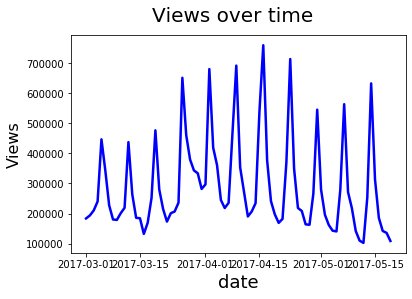

In [5]:
#a problem statement of the company can be analysed as below 

fig = plt.figure()
plt.plot(df.Date,df.Views_show, color="blue", linewidth=2.5, linestyle="-")

fig.suptitle('Views over time', fontsize=20)              # Plot heading 
plt.xlabel('date', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)   



In [6]:
def diagnostic_plots(df,var): 
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1) #one row, two cols, first graph 
    df[var].hist(bins=30)
    plt.subplot(1,2,2)
    stats.probplot(df[var],dist='norm',plot=plt)
    plt.show()

In [7]:
continous_vars=['Views_show','Visitors','Views_platform','Ad_impression']

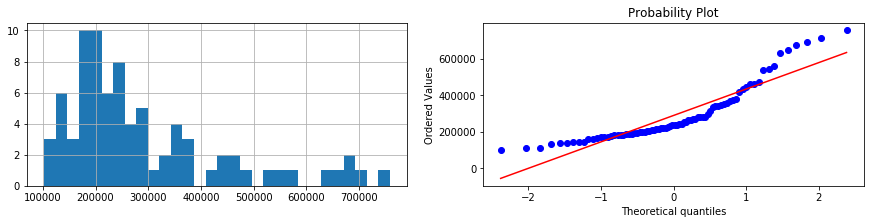

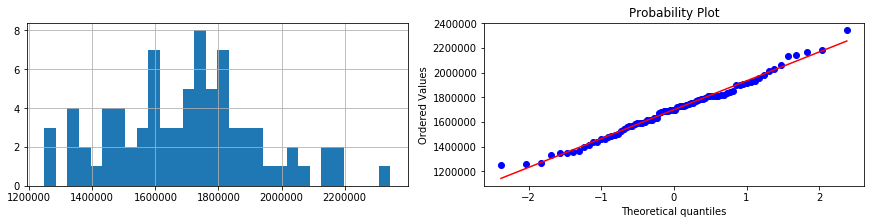

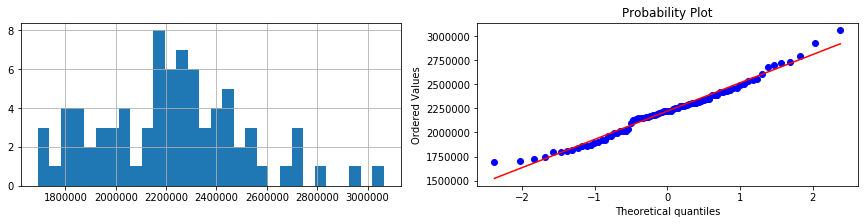

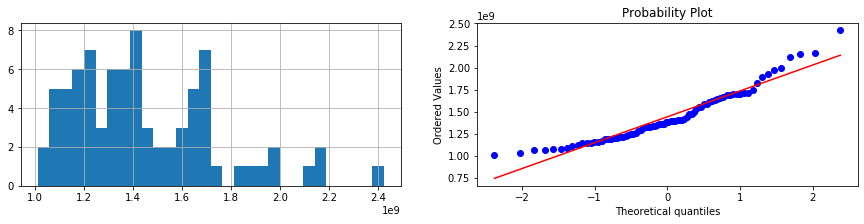

In [8]:
for i in continous_vars: 
    diagnostic_plots(df,i)

### taking the logs of the continous variables to achieve normal dist 

In [9]:
media_df=df.copy()

In [10]:
negatron=FunctionTransformer(np.log)

In [11]:
media_df=negatron.transform(df[continous_vars])

In [12]:
# media_df=pd.DataFrame(media_df,columns=[continous_vars])

In [13]:
media_df.head()

,Views_show,Visitors,Views_platform,Ad_impression
0,12.121266,14.046803,14.349942,20.782346
1,12.174391,14.054969,14.340669,20.754616
2,12.257141,14.037199,14.361408,20.734075
3,12.388648,14.216240,14.433586,20.799481
4,13.008778,14.282204,14.529155,21.029085


In [14]:
df.drop(columns=['Views_show', 'Visitors','Views_platform','Ad_impression'],inplace=True)

In [15]:
df3=pd.concat([df, media_df], axis=1)

In [16]:
df3

,Date,Cricket_match_india,Character_A,Views_show,Visitors,Views_platform,Ad_impression
0,2017-03-01,0,0,12.121266,14.046803,14.349942,20.782346
1,2017-03-02,0,0,12.174391,14.054969,14.340669,20.754616
2,2017-03-03,0,0,12.257141,14.037199,14.361408,20.734075
3,2017-03-04,1,0,12.388648,14.216240,14.433586,20.799481
4,2017-03-05,0,0,13.008778,14.282204,14.529155,21.029085
...,...,...,...,...,...,...,...
75,2017-05-15,1,0,12.656973,14.408110,14.616071,21.058346
76,2017-05-16,1,0,12.131829,14.411170,14.603897,20.994789
77,2017-05-17,1,0,11.865412,14.378437,14.615605,20.945021
78,2017-05-18,1,0,11.819461,14.374929,14.649632,20.973915


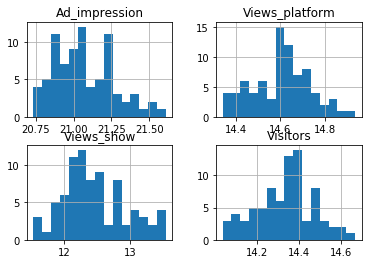

In [17]:

df3[continous_vars].hist(bins=15)

plt.show()

In [18]:
from datetime import date
df3['Date'] = pd.to_datetime(df3['Date'])


In [19]:
d0 = df3['Date'].min()
d0

Timestamp('2017-03-01 00:00:00')

In [20]:
d1 = df3.Date

delta = d1 - d0
df3['day']= delta

In [21]:
df3.head()

,Date,Cricket_match_india,Character_A,Views_show,Visitors,Views_platform,Ad_impression,day
0,2017-03-01,0,0,12.121266,14.046803,14.349942,20.782346,0 days
1,2017-03-02,0,0,12.174391,14.054969,14.340669,20.754616,1 days
2,2017-03-03,0,0,12.257141,14.037199,14.361408,20.734075,2 days
3,2017-03-04,1,0,12.388648,14.216240,14.433586,20.799481,3 days
4,2017-03-05,0,0,13.008778,14.282204,14.529155,21.029085,4 days


In [22]:
df3['day'] = df3['day'].astype(str)
df3['day'] = df3['day'].map(lambda x: x[0:2])
df3['day'] = df3['day'].astype(int)

In [23]:
df3.head()

,Date,Cricket_match_india,Character_A,Views_show,Visitors,Views_platform,Ad_impression,day
0,2017-03-01,0,0,12.121266,14.046803,14.349942,20.782346,0
1,2017-03-02,0,0,12.174391,14.054969,14.340669,20.754616,1
2,2017-03-03,0,0,12.257141,14.037199,14.361408,20.734075,2
3,2017-03-04,1,0,12.388648,14.216240,14.433586,20.799481,3
4,2017-03-05,0,0,13.008778,14.282204,14.529155,21.029085,4


In [24]:
df3['weekday'] = (df3['day']+3)%7
df3.weekday.replace(0,7, inplace=True)
df3['weekday'] = df3['weekday'].astype(int)
df3.head()

,Date,Cricket_match_india,Character_A,Views_show,Visitors,Views_platform,Ad_impression,day,weekday
0,2017-03-01,0,0,12.121266,14.046803,14.349942,20.782346,0,3
1,2017-03-02,0,0,12.174391,14.054969,14.340669,20.754616,1,4
2,2017-03-03,0,0,12.257141,14.037199,14.361408,20.734075,2,5
3,2017-03-04,1,0,12.388648,14.216240,14.433586,20.799481,3,6
4,2017-03-05,0,0,13.008778,14.282204,14.529155,21.029085,4,7


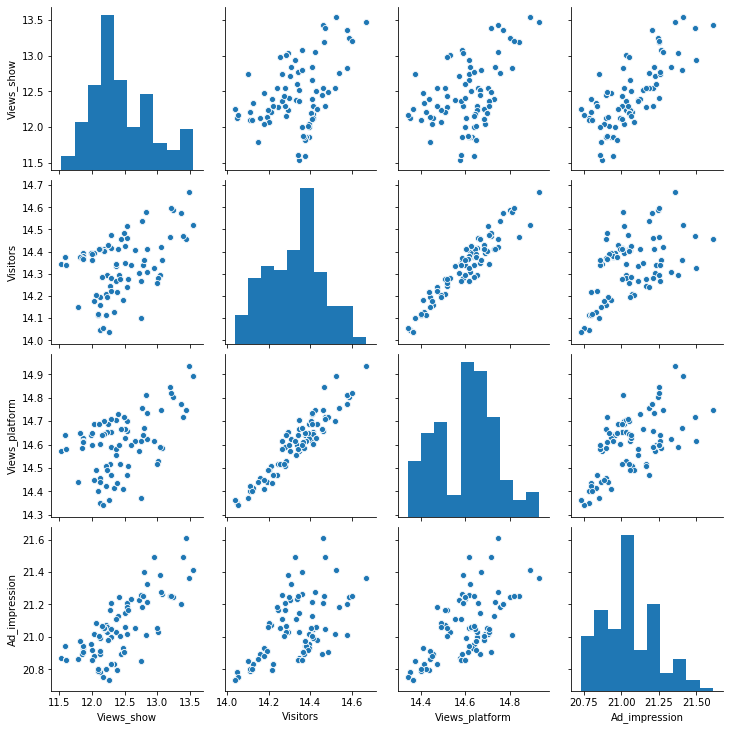

In [25]:
sns.pairplot(df3.iloc[:,3:7].sample(500,replace=True))
plt.show()


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
#instantiating an object named 'scaly'
scaly = MinMaxScaler() 

In [28]:
# Apply scaly() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Views_show', 'Visitors', 'Views_platform','Ad_impression']

df3[num_vars] = scaly.fit_transform(df3[num_vars])

In [29]:
df3.head()

,Date,Cricket_match_india,Character_A,Views_show,Visitors,Views_platform,Ad_impression,day,weekday
0,2017-03-01,0,0,0.291514,0.015233,0.015593,0.055187,0,3
1,2017-03-02,0,0,0.318057,0.028186,0.000000,0.023484,1,4
2,2017-03-03,0,0,0.359402,0.000000,0.034873,0.000000,2,5
3,2017-03-04,1,0,0.425108,0.283989,0.156241,0.074776,3,6
4,2017-03-05,0,0,0.734947,0.388620,0.316943,0.337273,4,7


In [30]:
#using 'Views_show' as the y variable- first we split the dataset 

In [31]:
y_train = df3.pop('Views_show') #popping the dependent variable to the y_train 
X_train = df3

In [32]:
X_train.head()

,Date,Cricket_match_india,Character_A,Visitors,Views_platform,Ad_impression,day,weekday
0,2017-03-01,0,0,0.015233,0.015593,0.055187,0,3
1,2017-03-02,0,0,0.028186,0.000000,0.023484,1,4
2,2017-03-03,0,0,0.000000,0.034873,0.000000,2,5
3,2017-03-04,1,0,0.283989,0.156241,0.074776,3,6
4,2017-03-05,0,0,0.388620,0.316943,0.337273,4,7


In [33]:
y_train.head()

0    0.291514
1    0.318057
2    0.359402
3    0.425108
4    0.734947
Name: Views_show, dtype: float64

In [34]:
y_train=pd.DataFrame(y_train)

In [35]:
#importing stats model

import statsmodels.api as sm

In [36]:
lm = LinearRegression()

In [37]:
# Putting feature variable to X
X = df3[['Visitors','weekday']]

# Putting response variable to y
y = y_train

In [38]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Running first model (lm1) Weekday & visitors

In [39]:
X = sm.add_constant(X)

lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     12.17
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           2.56e-05
Time:                        12:26:46   Log-Likelihood:                 13.119
No. Observations:                  80   AIC:                            -20.24
Df Residuals:                      77   BIC:                            -13.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1581      0.067      2.375      0.0

In [40]:
# so the 'weekday' variable seems a bit non - significant - we can break it down by one-hot encoding the weekend specifically 

# we can do that with a simple function 
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

df3['weekend']=[cond(i) for i in df3['day']]


In [41]:
df3.head()


,Date,Cricket_match_india,Character_A,Visitors,Views_platform,Ad_impression,day,weekday,weekend
0,2017-03-01,0,0,0.015233,0.015593,0.055187,0,3,0
1,2017-03-02,0,0,0.028186,0.000000,0.023484,1,4,0
2,2017-03-03,0,0,0.000000,0.034873,0.000000,2,5,0
3,2017-03-04,1,0,0.283989,0.156241,0.074776,3,6,0
4,2017-03-05,0,0,0.388620,0.316943,0.337273,4,7,1


In [42]:
# now Running second model (lm2) weekend & visitors
X = df3[['Visitors','weekend']]

# Putting response variable to y
y = y_train



In [43]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())


                                 OLS Regression Results                                
Dep. Variable:             Views_show   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              258.9
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                    3.66e-35
Time:                        12:26:46   Log-Likelihood:                          20.577
No. Observations:                  80   AIC:                                     -37.15
Df Residuals:                      78   BIC:                                     -32.39
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
#both features are statistically significant- we can proceed with adding another variable 
# Putting feature variable to X 
X = df3[['Visitors','weekend','Character_A']]

# Putting response variable to y
y = y_train

In [46]:
X = sm.add_constant(X) 
# re-adding the constant 
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     53.40
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.12e-18
Time:                        12:26:46   Log-Likelihood:                 47.492
No. Observations:                  80   AIC:                            -86.98
Df Residuals:                      76   BIC:                            -77.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2230      0.037      5.974      

In [47]:
#both features are statistically significant- we can proceed with adding another variable 
# Putting feature variable to X 
X = df3[['Visitors','weekend','Character_A','Views_platform']]

# Putting response variable to y
y = y_train

In [48]:
X = sm.add_constant(X) 
# re-adding the constant 
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     40.78
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           4.08e-18
Time:                        12:26:46   Log-Likelihood:                 48.347
No. Observations:                  80   AIC:                            -86.69
Df Residuals:                      75   BIC:                            -74.78
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2313      0.038      6.

In [49]:
#dropping views_platform due to statistical insignificance & re-ordering 
X = df3[['Visitors','weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = y_train


In [50]:
X = sm.add_constant(X) 
# re-adding the constant 
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     48.35
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           4.83e-20
Time:                        12:26:46   Log-Likelihood:                 53.132
No. Observations:                  80   AIC:                            -96.26
Df Residuals:                      75   BIC:                            -84.35
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1783      0.037      4.759

In [51]:
#dropping visitors due to statistical insignificance & re-ordering 
X = df3[['weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = y_train


In [52]:
X = sm.add_constant(X) 
# re-adding the constant 
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     64.68
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           7.13e-21
Time:                        12:26:46   Log-Likelihood:                 52.850
No. Observations:                  80   AIC:                            -97.70
Df Residuals:                      76   BIC:                            -88.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1937      0.031      6.297

In [53]:
#re-ordering
X = df3[['weekend','Ad_impression']]

# Putting response variable to y
y = y_train


In [54]:
X = sm.add_constant(X) 
# re-adding the constant 
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     94.61
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.81e-21
Time:                        12:26:46   Log-Likelihood:                 51.756
No. Observations:                  80   AIC:                            -97.51
Df Residuals:                      77   BIC:                            -90.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1789      0.029      6.120

In [55]:
#re-ordering
X = df3[['weekend','Ad_impression','Cricket_match_india']]

# Putting response variable to y
y = y_train


In [56]:
X = sm.add_constant(X) 
# re-adding the constant 
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     62.55
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.77e-20
Time:                        12:26:46   Log-Likelihood:                 51.888
No. Observations:                  80   AIC:                            -95.78
Df Residuals:                      76   BIC:                            -86.25
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1836    

In [57]:
#assuming we have tested all use varaibles- we can assume that lm7 will give us an accurate prediction 
# Making predictions using the model
X = X = df3[['weekend','Ad_impression']]
X = sm.add_constant(X)
Predicted_views = lm_7.predict(X)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, Predicted_views)
r_squared = r2_score(y_train, Predicted_views)

Text(0, 0.5, 'Views')

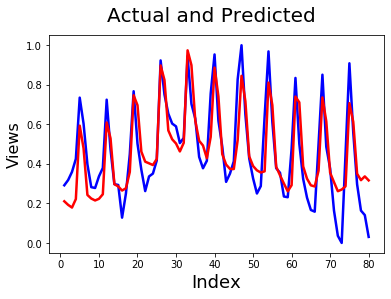

In [59]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)      

Text(0.5, 0, 'Errors')

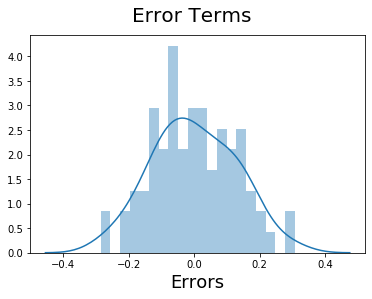

In [60]:
suby=y_train.subtract(Predicted_views, axis = 0) 
fig = plt.figure()
sns.distplot(suby, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)           

Text(0, 0.5, 'y_pred')

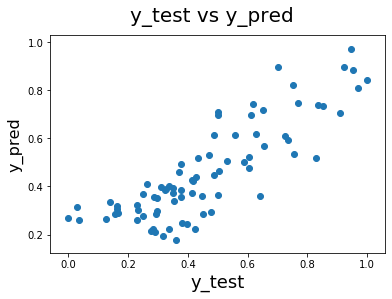

In [61]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, Predicted_views)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_train, Predicted_views)

0.7107732208492905